# Lending Club Case Study - Exploratory Data Analysis

### Group Members:
1. Harshul Agarwal
2. Mikhil Varshney

### Assignment Brief:

You work for a consumer finance company **Lending Club** which specializes in lending various types of loans to urban customers. This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. When the company receives a loan application, the company has to **make a decision for loan approval based on the applicant’s profile.**
When a person applies for a loan, there are two types of decisions that could be taken by the company:

**<font color='red'>1. Loan accepted:** </font> If the company approves the loan, there are 3 possible scenarios described below:

**<font color='blue'>Fully paid:** </font> Applicant has fully paid the loan (the principal and the interest rate)

**<font color='blue'>Current:**</font> Applicant is in the process of paying the installments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

**<font color='blue'>Charged-off:** </font> Applicant has not paid the installments in due time for a long period of time, i.e. he/she has defaulted on the loan 

**<font color='red'>2. Loan rejected:**</font> The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Business Objectives:

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders.

Objective is to <font color='blue'>identify the risky loan applicants at the time of loan application**</font> so that such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, <font color='blue'>**to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.** </font> The company can utilise this knowledge for its portfolio and risk assessment. And thus minimise the risk of losing money while lending to customers.

### Data
We have been provided with the **Private Data** of Lending Club.
<br>The complete **loan data** for all loans issued through the time period **2007 to 2011**.
We also have a data dictionary which describes the meaning of these variables.

# Exploratory Data Analysis
#### ** In the below section, we will get an intution of the various important features and will visualize their behavious over time and relationship with other features.**

####  Analysis Variables
+ Loan amount distribution.
+ Number of Loans over time.
+ Average Loan Amount over time
+ Relationship between Loan Amount and Loan status.
+ Distributin of Loan Amount over Purpose
+ Interest Rate Distribution
+ Relationsip between Interest Rate and Term.
+ Relationsip between Interest Rate and sub-grade.
+ Interest Rates over time.
+ DTI relationship with loan status
+ Relationship between Loan_amount,Term, Loan status
+ Relationship between Annual Income, Grade, Delinq_2yrs, loan status

#### Probability charged off on different variables
+ Interest Rate
+ annual income
+ Location
        
#### Questions we are trying to answer in our analysis.

+ How variables like Loan amount, Term, Grade, interest rate impact loan status?
+ DTI ratio of people getting most rejected loans and accepted loan.
+ States where there are most rejected loans.
+ Does employement_length has any impact analysing the no. of loan disbursement,loan default
+ Relationship of Amount requested and employment length?
+ How borrowers past history impacts the loan default.


### Assumption: 
<br>The loan request if graded by LC and then listed for loan. Now it is up to the investor who decides which loan listing to invest in looking at the loan detail and borrowers information.
<br>Only those variables be chosen for analysis that will be available to the investor at the time of deciding whether to invest in a loan request or not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the csv file
loan= pd.read_csv("C:/Users/harsh/Downloads/pgdai/lending case study/loan.csv")

In [4]:
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [5]:
loan.shape

(39717, 111)

In [6]:
loan.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

In [7]:
# Checking no of NAN values in dataset
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
# percentage of missing values in each column
round(loan.isnull().sum()/len(loan.index), 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

Data Cleaning

In [9]:
#Removing column with more than 60% missing value
missing_values = loan.columns[(loan.isnull().sum() / len(loan.index))*100 > 60]
print(missing_values)

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [10]:
#Dropping the column having missing values morethan 60%
loan = loan.drop(missing_values, axis= 1)

In [11]:
loan.shape

(39717, 54)

In [12]:
round(loan.isnull().sum()/ len(loan), 4)*100

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [13]:
#Checking remain data info
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [14]:
# unique values
# We will remove all columns where number of unique value is only 1 because that will not make any sense in the analysis.
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [15]:
#removing all cloumns where number of unique values is 1 and dont contain NAN values
for col in loan.columns:
    if len(loan[col].unique()) == 1:
        loan.drop(col,inplace=True,axis=1)

In [16]:
# No of columns after removing 
loan.shape

(39717, 48)

In [17]:
#Checking again if there are any cloumns left with less than 2 unique values
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [18]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [19]:
#removing columns which are not influencing our target variable i.e loan status. 
#here we are assuming that the columns representing customer behavior are not relevant w.r.t our analysis
loan = loan.drop(['delinq_2yrs', 'inq_last_6mths', 'open_acc','pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
                  'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                  'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d','collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens','id', 'member_id',
                                 'url', 'desc', 'zip_code','pub_rec_bankruptcies','earliest_cr_line','title'
                 ], axis = 1)

In [20]:
#  removing columns 'funded_amnt', 'funded_amnt_inv' since they are processed after lending club analysis so unnecessary wrt to our analysis
loan = loan.drop(['funded_amnt', 'funded_amnt_inv'], axis = 1)

In [21]:
loan.shape

(39717, 16)

In [22]:
#  Removing rows having loan status as current since they could be fully paid or default in future and are undetermined now
loan = loan[loan['loan_status'] != 'Current']

In [23]:
# Shape after removing "Current" loan status
loan.shape

(38577, 16)

In [24]:
loan.isnull().sum()*100/loan.shape[0]

loan_amnt              0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_title              6.185033
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
addr_state             0.000000
dti                    0.000000
dtype: float64

In [25]:
loan.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_title              2386
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
dtype: int64

Can impute title column with mode value since it has a categorical values. Thus 'Debt Consolidation' can be used to impute NAN values

In [26]:
loan['emp_title'].describe() 

count       36191
unique      28027
top       US Army
freq          131
Name: emp_title, dtype: object

Can impute emp_title column with mode since it has a categorical values. Thus 'US ARMY' can be used to impute NAN values.


In [27]:
loan['emp_title'].fillna(loan['emp_title'].mode()[0], inplace = True)

In [28]:
loan['emp_length'].describe() 

count         37544
unique           11
top       10+ years
freq           8488
Name: emp_length, dtype: object

Can impute emp_length column with mode since it has a categorical values. Thus '10+ years' can be used to impute NAN values.

In [29]:
loan['emp_length'].fillna(loan['emp_length'].mode()[0], inplace = True)

In [30]:
loan.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
addr_state             0
dti                    0
dtype: int64

In [31]:
# Checking max no of null values in rows.
loan.isnull().sum(axis = 1).describe()

count    38577.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
dtype: float64

In [32]:
#dropping the rows where home ownership is none because only 3 rows are present.
loan = loan[loan['home_ownership'] != 'NONE']

In [33]:
loan.shape

(38574, 16)

In [34]:
loan.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
addr_state             0
dti                    0
dtype: int64

# Handling Incorrect Data type

In [35]:
loan.dtypes

loan_amnt                int64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_title               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
addr_state              object
dti                    float64
dtype: object

In [36]:
loan['int_rate'] = loan['int_rate'].apply(lambda x: x[:-1])
loan['int_rate'] = loan['int_rate'].astype(float)

In [37]:
loan['int_rate'].describe()

count    38574.000000
mean        11.932470
std          3.691354
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

Converting loan_amnt, installment, int_rate, annual_inc, dti, term columns to numeric

In [38]:
numeric_columns = ['loan_amnt','installment','int_rate','annual_inc','dti']
loan[numeric_columns] = loan[numeric_columns].apply(pd.to_numeric)

In [39]:
loan['term'] = loan['term'].apply(lambda x: x.split(" ")[-2])

Converting issue date to date time

In [40]:
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')

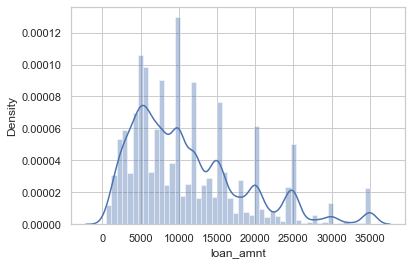

In [41]:
#checking distrbution of loan amount
sns.distplot(loan['loan_amnt'])
plt.show()

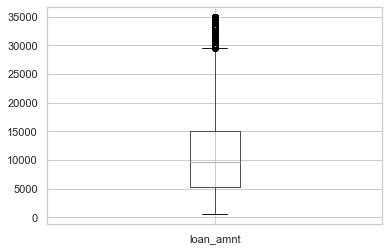

In [42]:
#checking if there are any outliers in the columns containing numerical values
loan.boxplot(column=['loan_amnt']);

<AxesSubplot:>

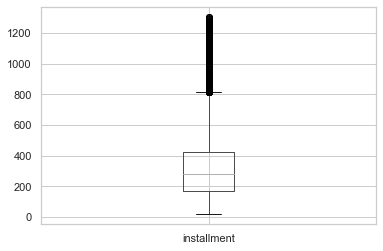

In [43]:
loan.boxplot(column=['installment'])

<AxesSubplot:>

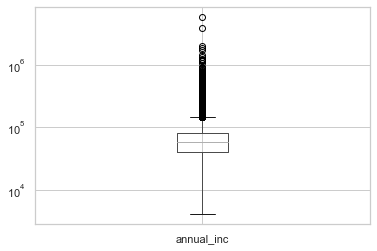

In [44]:
plt.yscale("log")
loan.boxplot('annual_inc')

In [45]:
loan.describe()

loan_amnt      int_rate   installment    annual_inc           dti
count  38574.000000  38574.000000  38574.000000  3.857400e+04  38574.000000
mean   11047.449059     11.932470    322.477676  6.877704e+04     13.272846
std     7348.517888      3.691354    208.641585  6.422001e+04      6.673167
min      500.000000      5.420000     15.690000  4.000000e+03      0.000000
25%     5300.000000      8.940000    165.740000  4.000000e+04      8.130000
50%     9600.000000     11.710000    277.860000  5.886028e+04     13.370000
75%    15000.000000     14.380000    425.550000  8.200000e+04     18.560000
max    35000.000000     24.400000   1305.190000  6.000000e+06     29.990000

In [46]:
loan['annual_inc'].quantile(0.995)

300000.0

In [47]:
# Removing Outliers : rows from "annual inc" after 99.5 percentile
loan=loan[loan['annual_inc']<loan['annual_inc'].quantile(0.995)]

In [48]:
loan['annual_inc'].describe()

count     38356.000000
mean      66155.431924
std       37320.714334
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      294000.000000
Name: annual_inc, dtype: float64

In [49]:
# Removing Outliers : rows from "installment" after 99.5 percentile
loan = loan[loan["installment"] < loan["installment"].quantile(0.995)]
loan["installment"].describe()

count    38163.000000
mean       316.974145
std        199.040801
min         15.690000
25%        165.280000
50%        276.060000
75%        419.780000
max       1049.310000
Name: installment, dtype: float64

In [50]:
loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti'],
      dtype='object')

In [51]:
loan.shape

(38163, 16)

In [52]:
loan['purpose'].value_counts()

debt_consolidation    17862
credit_card            4982
other                  3837
home_improvement       2806
major_purchase         2135
small_business         1722
car                    1497
wedding                 918
medical                 676
moving                  571
vacation                375
house                   358
educational             324
renewable_energy        100
Name: purpose, dtype: int64

In [53]:
loan['emp_length'].dtype

dtype('O')

Converting emp_length column into int type

In [54]:
loan['emp_length'] = loan['emp_length'].apply(lambda x: '0' if x == '< 1 year' else ( '10' if x == '10+ years' else x[0] ))

In [55]:
loan['emp_length'] = loan['emp_length'].astype(int)

In [56]:
loan['emp_length'].describe()

count    38163.000000
mean         5.067054
std          3.601033
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

# Data Analysis

In [57]:
#setting display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

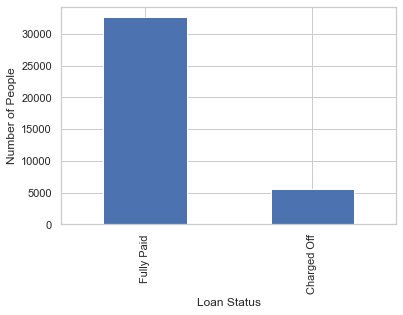

In [58]:
loan['loan_status'].value_counts().plot.bar(xlabel = 'Loan Status' ,ylabel = 'Number of People')
plt.show()

From this above information
1. More than 30000 people have fully paid
2. 5000 people are Charged Off

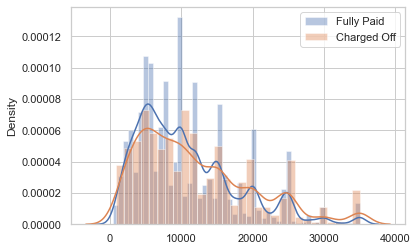

In [59]:
sns.distplot(x=loan[loan["loan_status"]=="Fully Paid"]["loan_amnt"], label="Fully Paid")
sns.distplot(x=loan[loan["loan_status"]=="Charged Off"]["loan_amnt"], label="Charged Off")
plt.legend()
plt.show()

From this above information
1. More people who borrow loan with amount lower around 13000 are able to fully pay their loan.
2. People borrowing more amount tend to default more.

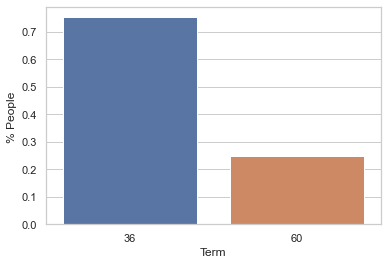

In [60]:
p = sns.barplot(loan['term'].value_counts(1).index, loan['term'].value_counts(1).values)
p.set(xlabel = 'Term', ylabel = '% People ')
plt.show()

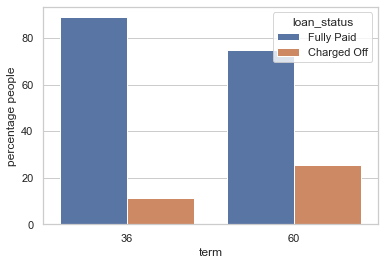

In [61]:
term_counts = (loan.groupby('term')['loan_status']
                     .value_counts(normalize=True)
                     .rename('percentage people')
                     .mul(100)
                     .reset_index()
                     )
p = sns.barplot(x='term', y="percentage people", hue="loan_status", data=term_counts)
plt.show()

From above 2 plots, we get information
1. More than 80% people of the total applied for 36 months loan period
2. More than 20% of the people who took loan for 60 months of term, defaulted their loan.

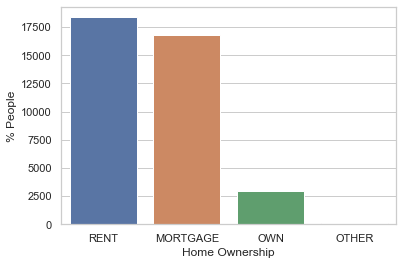

In [62]:
p = sns.barplot(loan['home_ownership'].value_counts().index, loan['home_ownership'].value_counts().values)
p.set(xlabel = 'Home Ownership',ylabel = '% People' )
plt.show()

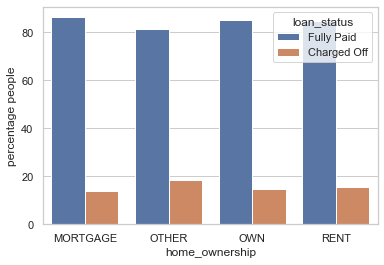

In [63]:
term_counts = (loan.groupby(['home_ownership'])['loan_status']
                     .value_counts(normalize=True)
                     .rename('percentage people')
                     .mul(100)
                     .reset_index())
p = sns.barplot(x='home_ownership', y="percentage people", hue="loan_status", data=term_counts)
plt.show()

In [64]:
loan.groupby(['home_ownership','loan_status'])['loan_amnt'].median()

home_ownership  loan_status
MORTGAGE        Charged Off    12000
                Fully Paid     10000
OTHER           Charged Off    14000
                Fully Paid     8000 
OWN             Charged Off    9425 
                Fully Paid     8000 
RENT            Charged Off    9000 
                Fully Paid     8000 
Name: loan_amnt, dtype: int64

Insights from the above graph and table
1. Max no of people live on rent.
2. Around 15% of the people living on rent are defaulters
3. Defaulters apply for higher loan amount in every home ownership category.

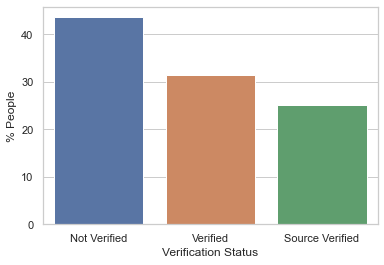

In [65]:
p = sns.barplot(loan['verification_status'].value_counts(1).index, (loan['verification_status'].value_counts(1)*100).values)
p.set(xlabel = 'Verification Status' ,ylabel = '% People' )
plt.show()

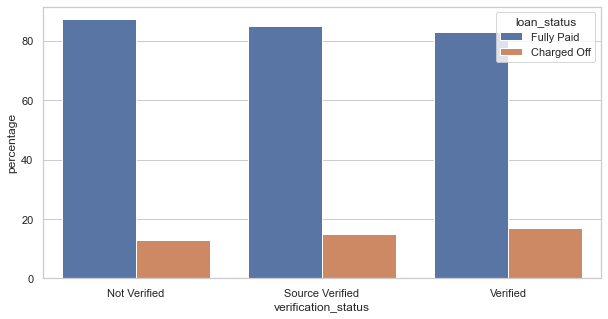

In [66]:
verification_status_counts = (loan.groupby('verification_status')['loan_status']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('verification_status'))
plt.figure(figsize=(10,5))
p = sns.barplot(x="verification_status", y="percentage", hue="loan_status", data=verification_status_counts)
plt.show()

Insights from the above 2 graphs
1. Most people were not verified.
2. Max people who defaulted their loan were verified (around 16% of the verified people).

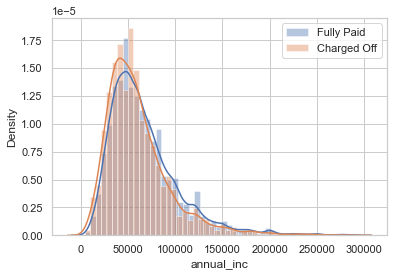

In [67]:
sns.distplot(loan[loan["loan_status"]=="Fully Paid"]['annual_inc'], label="Fully Paid")
sns.distplot(loan[loan["loan_status"]=="Charged Off"]['annual_inc'], label="Charged Off")
plt.legend()
plt.show()

Insights from the above graph
1. People having lower annual income (less than around 60000) have defaulted their loan more and the default rate decreases at high annual income level.

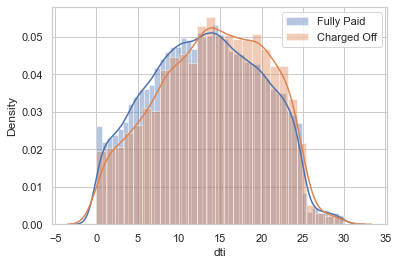

In [68]:
sns.distplot(loan[loan["loan_status"]=="Fully Paid"]['dti'], label="Fully Paid")
sns.distplot(loan[loan["loan_status"]=="Charged Off"]['dti'], label="Charged Off")
plt.legend()
plt.show()

Insights from the above graph
1. People having lower debt to income ratio tend to fully pay their loan and vice versa.

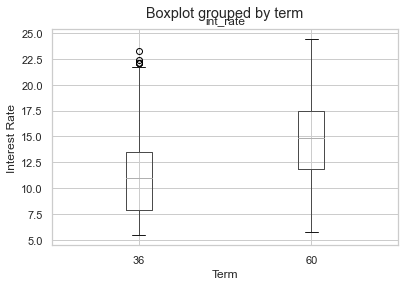

In [69]:
tr = loan.boxplot(column="int_rate",by = "term")
tr.set(xlabel='Term', ylabel='Interest Rate')
plt.show()

Insights from the above graph
1. On an avg, 36 month term loan has lower interest rates as compared to 60 month term loan.

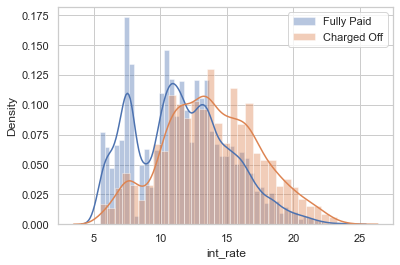

In [70]:
sns.distplot(loan[loan["loan_status"]=="Fully Paid"]['int_rate'], label="Fully Paid")
sns.distplot(loan[loan["loan_status"]=="Charged Off"]['int_rate'], label="Charged Off")
plt.legend()
plt.show()

Insights from the above graph
1. More no of defaulters for the loan having higher rate of interest (around 12% interest rate)

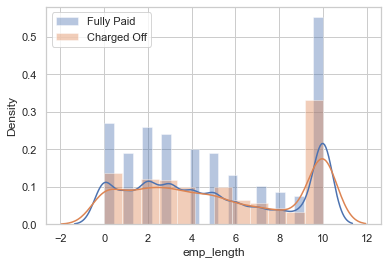

In [71]:
sns.distplot(loan[loan["loan_status"]=="Fully Paid"]['emp_length'], label="Fully Paid")
sns.distplot(loan[loan["loan_status"]=="Charged Off"]['emp_length'], label="Charged Off")
plt.legend()
plt.show()

Not much insightful, just employees with 10+ years of experience are slightly more likely to fully pay their loans.

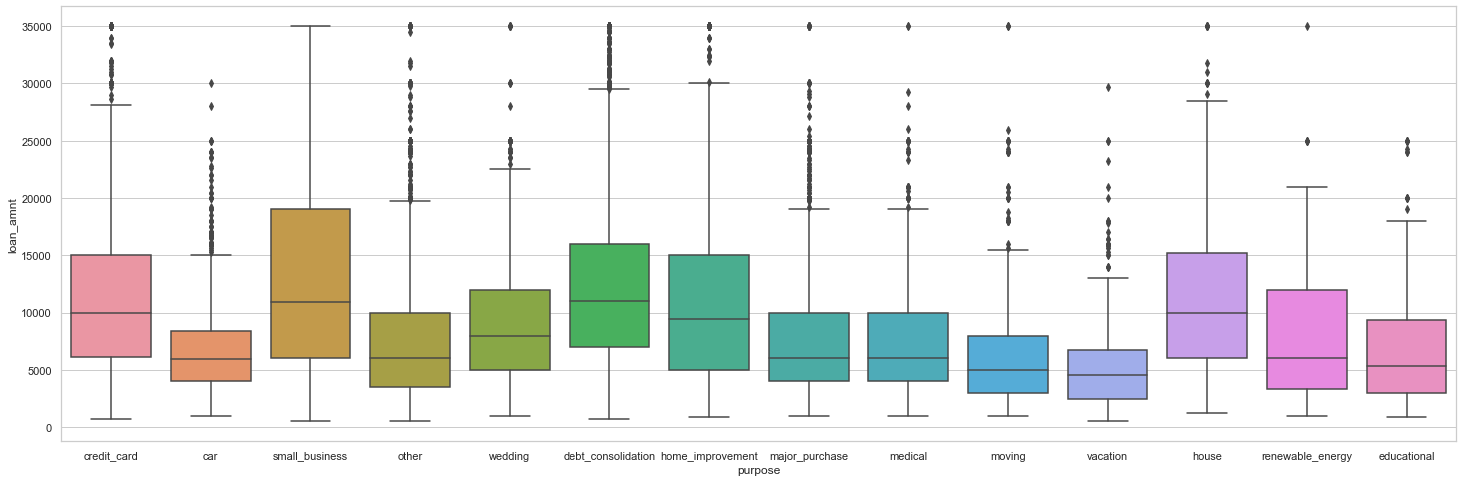

In [72]:
plt.figure(figsize=(25,8))
sns.boxplot(y=loan['loan_amnt'], x = loan['purpose'])
plt.show()

Insights from the above graph
1. People who applied for loan for small business purpose, applied for higher loan amount.

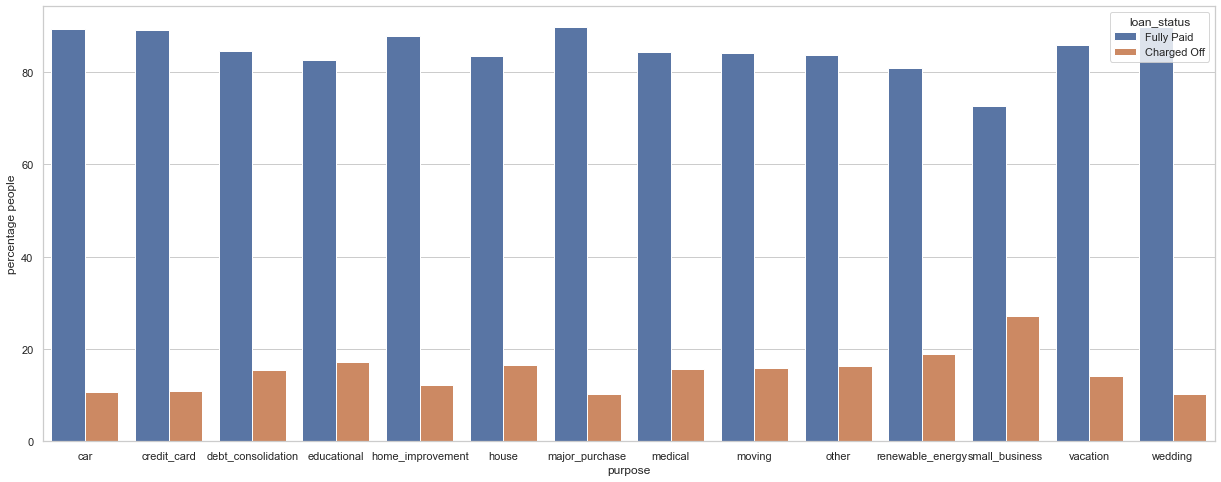

In [73]:
purpose_counts = (loan.groupby('purpose')['loan_status']
                     .value_counts(normalize=True)
                     .rename('percentage people')
                     .mul(100)
                     .reset_index()
                     .sort_values('purpose'))
plt.figure(figsize=(21,8))
p = sns.barplot(x="purpose", y="percentage people", hue="loan_status", data=purpose_counts)
plt.show()

Insights from the above graph
1. People who take loan for small business related purpose are most defaulters.

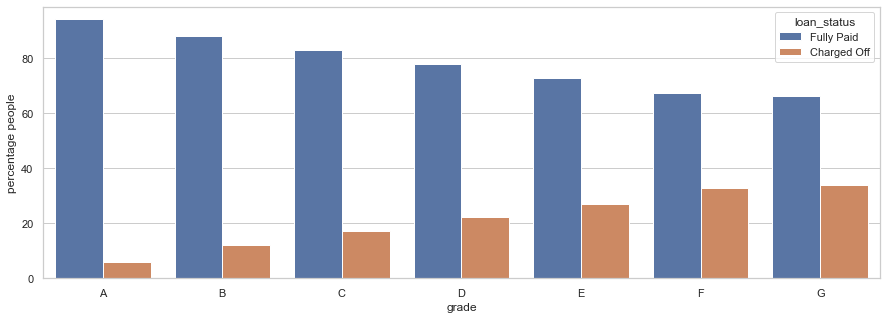

In [74]:
grade_counts = (loan.groupby(["grade"])['loan_status']
                     .value_counts(normalize=True)
                     .rename('percentage people')
                     .mul(100)
                     .reset_index()
                     )
plt.figure(figsize=(15,5))
p = sns.barplot(x='grade', y="percentage people", hue="loan_status", data=grade_counts)
plt.show()

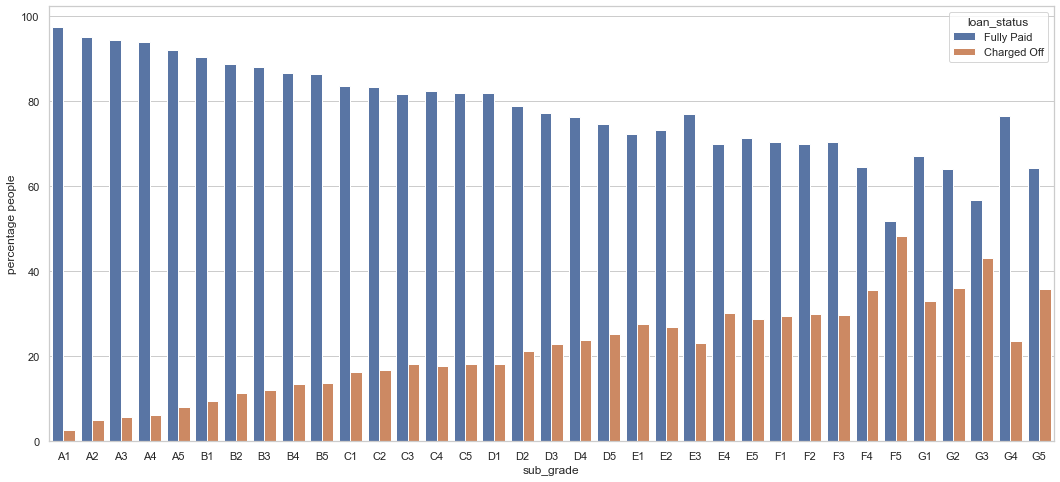

In [75]:
grade_counts = (loan.groupby(["sub_grade"])['loan_status']
                     .value_counts(normalize=True)
                     .rename('percentage people')
                     .mul(100)
                     .reset_index()
                     )
plt.figure(figsize=(18,8))
p = sns.barplot(x='sub_grade', y="percentage people", hue="loan_status", data=grade_counts)
plt.show()

Insights from the above information
1. Giving loans to group A, B people will be safe as they have lower chance of defaulting their loans. 
2. Grade E, F, G loans are less safe as compared to others.
3. More than 90% people of grade A in all sub grades have fully paid their loan.
4. Grade F5 is worst when comes to full payment of loan (around 50% defaulters).

In [76]:
loan.groupby(["grade","sub_grade"]).median()

loan_amnt  int_rate  installment  emp_length  annual_inc  \
grade sub_grade                                                             
A     A1         6000.0     5.420     182.620      7.0         60000.0      
      A2         6375.0     5.990     187.150      5.0         57400.0      
      A3         7000.0     7.140     211.410      5.0         55000.0      
      A4         8000.0     7.510     247.815      4.0         57099.0      
      A5         9000.0     8.490     250.250      4.0         58000.0      
B     B1         8400.0     9.910     257.220      5.0         54996.0      
      B2         9000.0     10.590    260.360      4.0         55840.0      
      B3         10000.0    10.990    281.640      5.0         58000.0      
      B4         10000.0    11.490    268.720      4.0         60000.0      
      B5         10000.0    11.860    284.300      4.0         57000.0      
C     C1         9475.0     12.990    271.450      4.0         55000.0      
      C2         9600.0     13.490    276.060      4.0         55580.0      
      C3         10000.0    13.570    284.910      4.0         55480.0      
      C4         9000.0     13.920    274.790      4.0         55000.0      
      C5         8000.0     14.260    267.535      4.0         54000.0      
D     D1         8000.0     14.610    276.700      4.0         55000.0      
      D2         9925.0     15.085    284.920      4.0         59000.0      
      D3         11000.0    15.580    316.230      4.0         56000.0      
      D4         12000.0    15.950    349.850      4.0         60000.0      
      D5         13000.0    16.320    351.670      5.0         60000.0      
E     E1         13500.0    16.450    367.970      5.0         60000.0      
      E2         14000.0    16.820    363.445      4.0         62000.0      
      E3         14500.0    17.190    370.300      4.0         60000.0      
      E4         15000.0    17.560    396.660      4.5         65000.0      
      E5         16000.0    17.930    424.710      5.0         75000.0      
F     F1         17000.0    18.300    429.410      5.0         71316.0      
      F2         17412.5    18.670    454.415      5.0         69998.0      
      F3         18825.0    19.040    480.100      4.5         73720.0      
      F4         18000.0    19.410    470.510      5.0         68000.0      
      F5         20000.0    19.790    552.900      6.0         75000.0      
G     G1         20000.0    20.160    550.770      5.0         73000.0      
      G2         22250.0    20.480    595.450      5.0         74454.0      
      G3         20500.0    20.900    568.600      5.5         74502.0      
      G4         22250.0    21.270    574.320      4.0         89004.0      
      G5         20000.0    21.590    575.715      4.0         89000.0      

                    dti  
grade sub_grade          
A     A1         10.030  
      A2         10.720  
      A3         11.405  
      A4         11.925  
      A5         12.455  
B     B1         12.690  
      B2         13.280  
      B3         13.670  
      B4         13.950  
      B5         13.860  
C     C1         14.170  
      C2         13.945  
      C3         13.925  
      C4         14.340  
      C5         14.300  
D     D1         14.200  
      D2         14.235  
      D3         14.400  
      D4         14.400  
      D5         14.115  
E     E1         14.225  
      E2         14.825  
      E3         14.170  
      E4         14.775  
      E5         14.900  
F     F1         14.550  
      F2         15.135  
      F3         14.890  
      F4         14.830  
      F5         14.870  
G     G1         13.650  
      G2         15.310  
      G3         16.630  
      G4         14.500  
      G5         15.665

Insights from the above table
1. Debt to Income ratio starts to increase from Group A to Group G. 
2. People apply for higher loan amount in groups E, F, G. 
3. Interest rate of loans also follow increasing trend when moved from group A to group G.

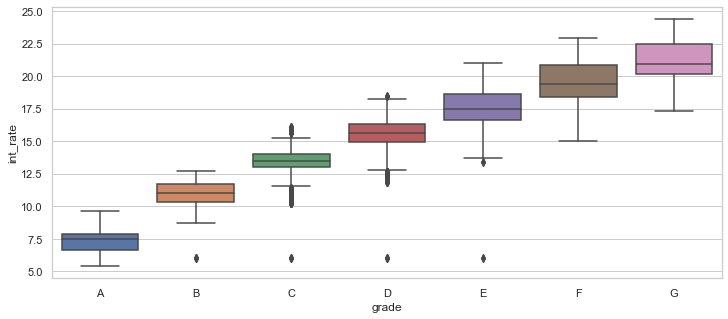

In [77]:
plt.figure(figsize=(12,5))
sns.boxplot(y=loan['int_rate'], x = loan['grade'], order=sorted(loan.grade.unique()))
plt.show()

Insights from the above graph
1. Group A and B people are charged with lesser rate of interest. This might be because of their higher credibilty and good credit score.

<AxesSubplot:xlabel='dti', ylabel='int_rate'>

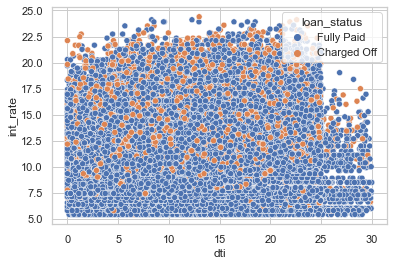

In [78]:
sns.scatterplot(x="dti", y="int_rate", hue="loan_status", data=loan)

Insights from the above graph
1. Below 10% interest rate, very less no of people tend to default.
2. With lower DTI, people tend to default more.

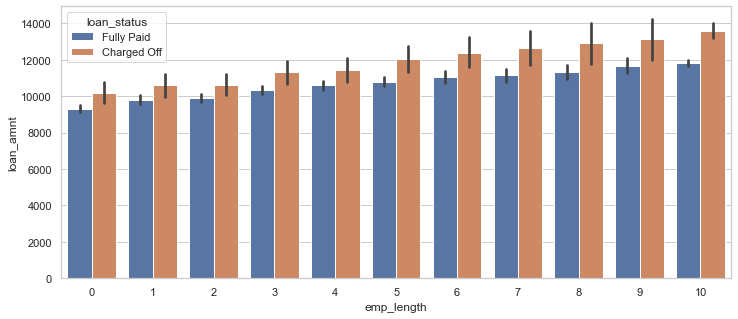

In [79]:
plt.figure(figsize=(12,5))
sns.barplot(x="emp_length", y="loan_amnt", hue="loan_status", data=loan)
plt.show()

Insights from the above graph
1. People having more experience take loan for higher amount.
2. Loans having higher loan amount tend to be charged off more.

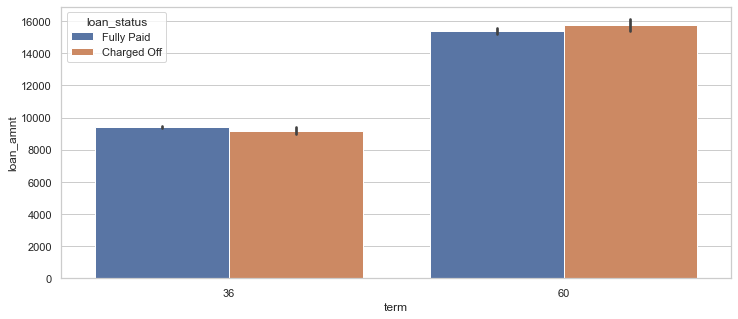

In [80]:
plt.figure(figsize=(12,5))
sns.barplot(x="term", y="loan_amnt", hue="loan_status", data=loan)
plt.show()

Insights from the above graph
1. The average loan amount is similar for both the terms for both loan status.
2. The average loan amount is higher for the 60 month term.

<AxesSubplot:>

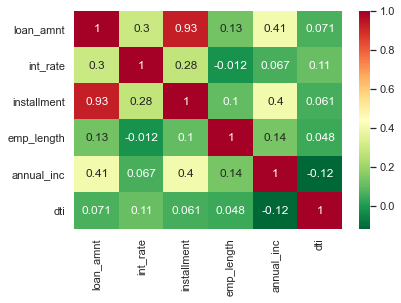

In [81]:
sns.heatmap(loan.corr(), annot =True, cmap = 'RdYlGn_r')

Insights from the above graph
1. Loan amount is highly correlated to installment amount. 
2. loan amount is 40% possitively correlated to annual income of the people.

In [82]:
loan.groupby('loan_status')['installment'].describe()

count        mean         std    min     25%      50%     75%  \
loan_status                                                                    
Charged Off  5582.0   332.195588  210.387397  22.79  168.45  291.845  452.98   
Fully Paid   32581.0  314.366303  196.916628  15.69  164.56  273.190  413.94   

                 max  
loan_status           
Charged Off  1049.10  
Fully Paid   1049.31

Insights from the above table
1. Installment is higher in case of charged off loans than the fully paid ones.

In [83]:
top10_emp_title = loan['emp_title'].value_counts().head(10)
top10_emp_title

US Army              2470
Bank of America      107 
IBM                  60  
AT&T                 57  
Kaiser Permanente    56  
Wells Fargo          52  
UPS                  52  
US Air Force         51  
USAF                 50  
Walmart              45  
Name: emp_title, dtype: int64

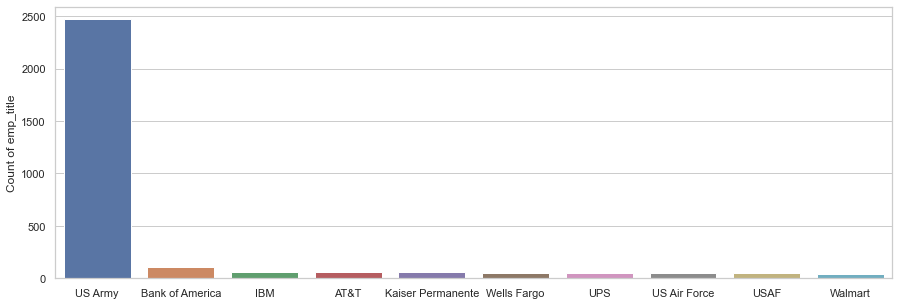

In [84]:
plt.figure(figsize=(15,5))
a=sns.barplot(x=top10_emp_title.index, y=top10_emp_title.values)
a.set_ylabel('Count of emp_title')
plt.show();

Insights from the above graph
1. Most people applying for loan work in US Army followed by Bank of America, IBM, AT&T.

<AxesSubplot:xlabel='Loan Issue Month', ylabel='Loan amount'>

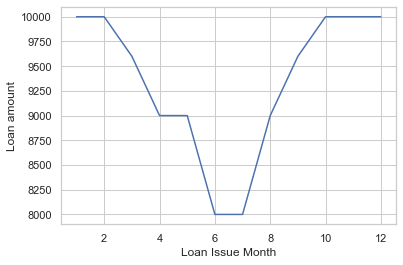

In [85]:
loan.groupby(loan['issue_d'].dt.month)['loan_amnt'].median().plot.line(xlabel='Loan Issue Month', ylabel='Loan amount')

Insights from the above graph
1. People applied for loan with higher amount in the months of January, February, October, November, December.
2. Applied loan amount was lowest in the month of June, July.

<AxesSubplot:xlabel='Loan Issue Month', ylabel='Interest Rate'>

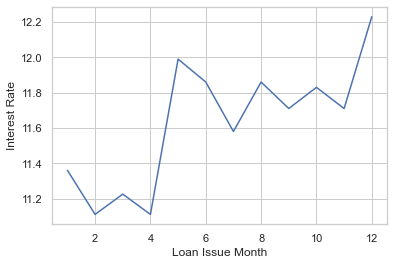

In [86]:
loan.groupby(loan['issue_d'].dt.month)['int_rate'].median().plot.line(xlabel='Loan Issue Month', ylabel='Interest Rate')

Insights from the above graph
1. Interest Rate was highest in the month of December

<AxesSubplot:xlabel='Loan Issue Month', ylabel='No. of Loans'>

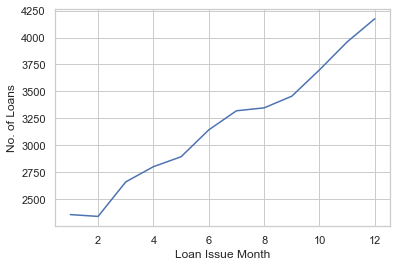

In [87]:
loan.groupby(loan['issue_d'].dt.month)['loan_amnt'].count().plot.line(xlabel='Loan Issue Month', ylabel='No. of Loans')

Insights from the above graph
1. More loans are applied in later half of the year.

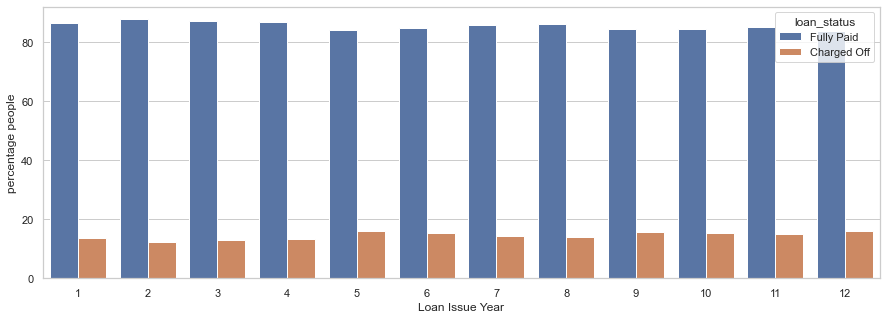

In [88]:
issue_d_counts = (loan.groupby(loan['issue_d'].dt.month)['loan_status']
                     .value_counts(normalize=True)
                     .rename('percentage people')
                     .mul(100)
                     .reset_index()
                     .sort_values('issue_d'))
plt.figure(figsize=(15,5))
p = sns.barplot(x="issue_d", y="percentage people", hue="loan_status", data=issue_d_counts)
p.set(xlabel = 'Loan Issue Year')
plt.show()

Insights from the above graph
1. Charged Off percentage is almost constant for every months and is under 20%.

<AxesSubplot:xlabel='Loan Issue Year', ylabel='Loan amount'>

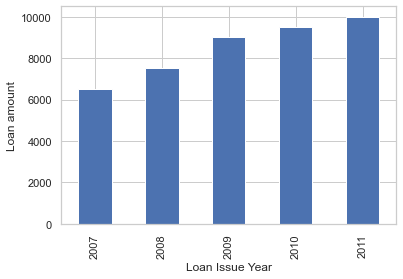

In [89]:
loan.groupby(loan['issue_d'].dt.year)['loan_amnt'].median().plot.bar(xlabel='Loan Issue Year', ylabel = 'Loan amount')

Insights from the above graph
1. Loan amount of the loans applied increased as years went by.

<AxesSubplot:xlabel='Loan Issue Year', ylabel='Interest rate'>

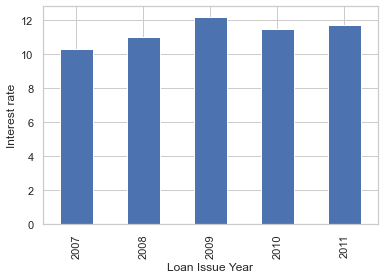

In [90]:
loan.groupby(loan['issue_d'].dt.year)['int_rate'].median().plot.bar(xlabel='Loan Issue Year', ylabel = 'Interest rate')

Insights from the above graph
1. Interest rate was maximum in year 2009.

[Text(0.5, 0, 'Loan Issue Year'), Text(0, 0.5, 'count of people')]

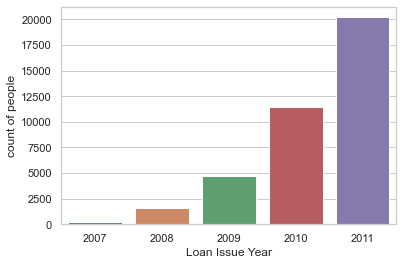

In [91]:
p = sns.countplot(loan['issue_d'].dt.year)
p.set(xlabel = 'Loan Issue Year', ylabel = 'count of people')

Insights from the above graph
1. Number of loans applied increased year after year.

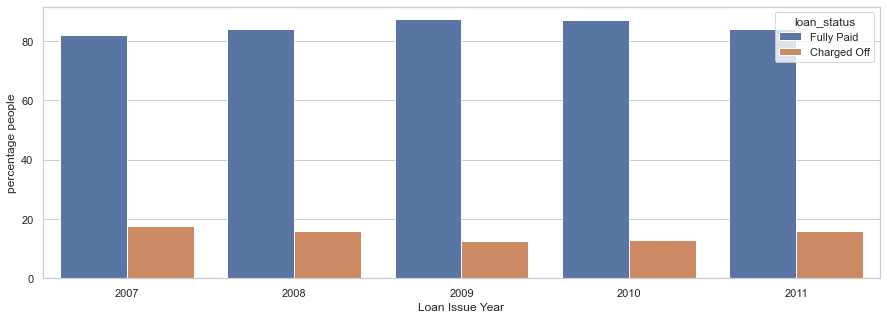

In [92]:
issue_d_year_counts = (loan.groupby(loan['issue_d'].dt.year)['loan_status']
                     .value_counts(normalize=True)
                     .rename('percentage people')
                     .mul(100)
                     .reset_index()
                    )
plt.figure(figsize=(15,5))
p = sns.barplot(x='issue_d', y="percentage people", hue="loan_status", data=issue_d_year_counts)
p.set(xlabel = 'Loan Issue Year')
plt.show()

Insights from the above graph
1. Charged Off percentage was highest in 2007 and it also increased in 2011. Might be because of recession in 2007.

# Final Words

1.Percentage of charged off loan increased as loan amount increases.

2.Small Business highest percent of charged off loans – Most risky Category in Purpose.

3.Maximum loan is given for 36 months, but the  of charged off for 60 months is almost same; Higher loan amount are associated with longer terms and see higher Charge Offs.

4.Int. rate for charged off loans appear to be higher Higher rate of interest for longer term of loan Risk increases as rate of interest increases along with Loan term.

5.When the dti or dept payment to income ratio is higher than 20, higher percentage of loans are Charged Off The dti increases with the number of open credit line in borrowers credit file Higher the dti higher the chances of loan being Charged Off

6.High chance of getting default for questionable record.

7.People who borrow loan with amount lower around are able to fully pay their loan rather than those whose borrowing more amount tend to default more.

8.More people applied loan for 36 months tenure & those who applied for 60 months are tend to be more defaulter. 

9.In terms of Hose_ownership , maximumn people are rented one & around 15% of the people living on rent are defaulters.

10.There is bit high percentage of defaults are recorded in other home ownership category.

11.Majority of loans were given without verification of applicants income.

12.People having lower annual income (less than around 60000) have defaulted their loan more and the default rate decreases at high annual income level.

# Recommendations

1.Lending Club should be wary of the loans where the purpose is Small Business as the percentage of a loan being charged off is maximum 27.1%.Accepting loans for the purpose of Weddings,major purchase, car and credit card is highly recommended.

2.Higher the loan amount, the higher the chances of loan being charged off. Therefore Lending Company should consider accepting loans of lower amount.The maximum number of loan are applied where the loan amount ranges between 5000 and 10000. For this range the probablity of the the loan getting charged off is very less. Hence the risk factor is low for lending club.

3.Lending Club should consider accepting more loans from applicants whose annual income is greater than 100000 as their probablity of charge off is minimum.

4.Lending Club should consider accepting more loans where interest rate is less than 7.5% as their probablity of charge off is minimum.

5.Lending Club should consider accepting more loans of grade A and B. It should be cautious of loans falling in grades E,F and G.

6.Lending Club should consider accepting more loans from people who owns a house.

7.The number of loan applicants are increasing with each passing year bringing more business to Lending Club which is leading to more loans getting accepted as well as more loans getting charged off. Moreover the last few months of the year are quite critical as most of the loans are either fully paid or charged off at that time.

8.Lending Club should accept more loans for the term of 36 months as the % of charged off loans is less and the no. of loan applicants are more. Also the avg fully paid loan amount is increasing over the years and avg charged off lon amount is decreasing over the years.